![Music_Recommodation](Music_Recommodation.png)

# **Music Recommendation System**

## **Problem Statement**
Music streaming platforms often struggle to provide personalized recommendations. Our goal is to develop a system that recommends songs based on both content (lyrics & audio features) and user preferences using hybrid methods.

## **Dataset**
We use the `tcc_ceds_music.csv` dataset containing metadata and audio features of songs.
We perform preprocessing on missing values and selected feature columns.

## **Selected Models**
1. Content-based (Lyrics using TF-IDF + Cosine Similarity)
2. Content-based (Lyrics using Word2Vec + Cosine Similarity)
3. Content-based (Audio Features using Cosine Similarity)

## **Evaluation Criteria**
As the system generates recommendations, we evaluate models based on
- **Similarity Score (Cosine Similarity)**

## **Install Neccessary Libraries**

In [22]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


## **Importing Libraries & Dataset**

In [2]:
# Import essential libraries for data manipulation and visualization
import pandas as pd                    # For handling data in tabular form (DataFrames)
import numpy as np                     # For numerical operations
import matplotlib.pyplot as plt        # For creating plots and graphs
import seaborn as sns                  # For advanced data visualizations
import random                          # For generating random numbers (e.g., simulating user ratings)
import gensim                          # Gensim library for text modeling (Word2Vec, etc.)

# Machine Learning & NLP Models
from sklearn.feature_extraction.text import TfidfVectorizer   # To convert text to TF-IDF matrix
from sklearn.metrics.pairwise import cosine_similarity        # To compute similarity between vectors
from sklearn.preprocessing import MinMaxScaler                # To normalize feature values between 0 and 1

# Collaborative filtering model
from surprise import SVD, Dataset, Reader                     # SVD for collaborative filtering

# Gensim NLP Tools
from gensim.utils import simple_preprocess                    # Tokenizes and preprocesses text
from gensim.models import Word2Vec                            # Word2Vec model for word embeddings

In [2]:
# Load data
data = pd.read_csv('tcc_ceds_music.csv')

In [3]:
# Show basic information of the dataset along with the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

In [4]:
# Display first five row
data.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


## **Exploratory Data Analysis (EDA)**
Distribution of Songs by Genre

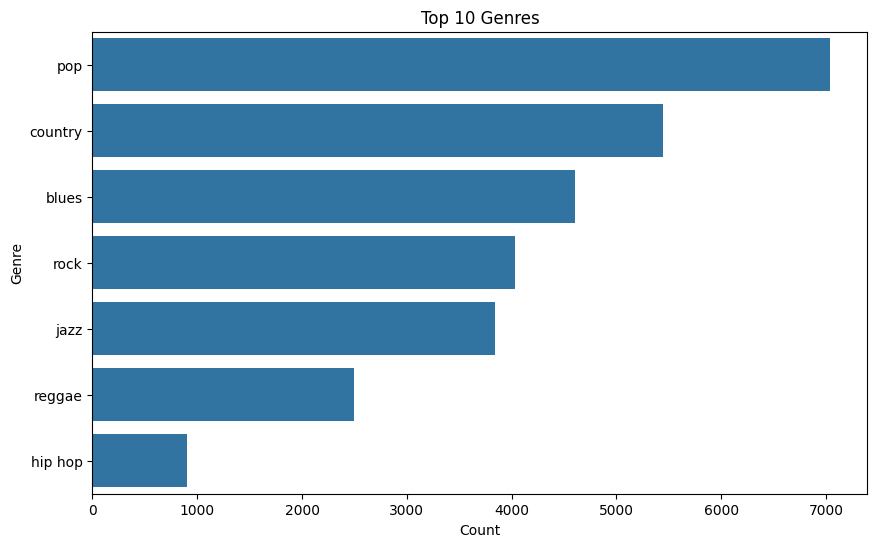

In [5]:
# Create a figure with size 10x6 inches
plt.figure(figsize=(10, 6))

# Plot a horizontal bar chart showing the count of each genre,
# ordering by the top 10 most frequent genres in the dataset
sns.countplot(y='genre', data=data, order=data['genre'].value_counts().index[:10])

# Set the title and axis labels
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')

# Display the plot
plt.show()

## **Top Artists by Song Count**

/var/folders/kc/wzqlm10x69xgkrpv4q3bp89w0000gn/T/ipykernel_1188/1580862728.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


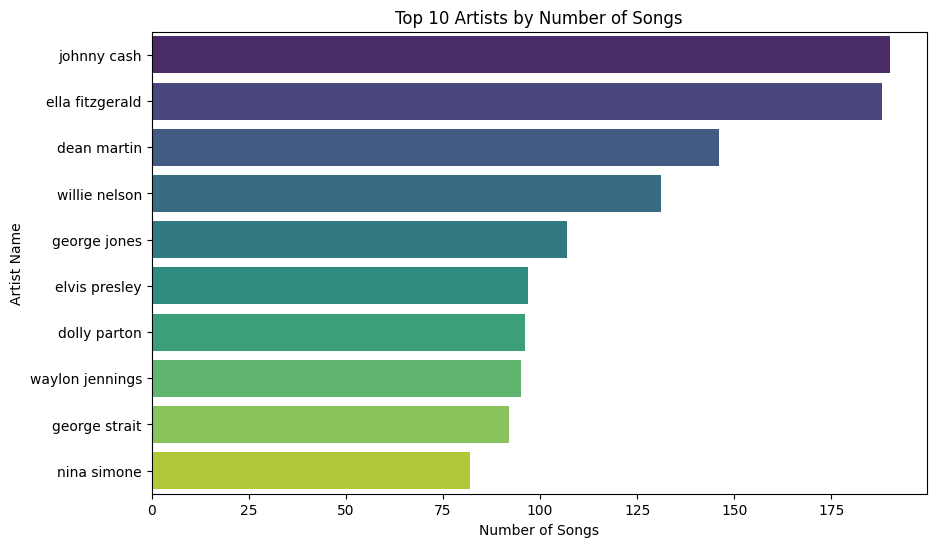

In [6]:
# Group data by 'artist_name' and count the number of songs for each artist,
# then sort the counts in descending order and select the top 10 artists
top_artists = data.groupby('artist_name').size().sort_values(ascending=False).head(10)

# Create a figure with size 10x6 inches
plt.figure(figsize=(10, 6))

# Plot a horizontal bar chart of the top 10 artists by number of songs,
# using the 'viridis' color palette
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')

# Set the title and axis labels
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')

# Display the plot
plt.show()

### *Baseline Model*
    • TF-IDF (Term Frequency-Inverse Document Frequency) + Cosine Similarity

### *Type*
    • Content-Based Recommendation (based on track , artist, and genre)

### *How it works*
	• Creates a new combined_features column using genre + artist_name + track_name.
	• Transforms the combined text into vectors using TF-IDF.
	• Computes cosine similarity between all songs in the dataset.
	• Given an input song title (e.g., "love"), the model finds similar songs based on text similarity.
	• Returns Top N most similar songs.
    
### *Strengths of this model*
	• Simple and fast, good as a baseline model.
	• No user history required (solves the cold start problem).
	• Easy to understand and implement.
	• Works well for theme-based or keyword-based recommendations.
    
### *Limitations*
	• Does not understand semantics, only word frequency.
	• No real personalization — results are the same for everyone.
	• Less effective when songs have common words (e.g., “love”, “pop”, "memories").

## **Preprocessing the Data**
Combine Features

In [7]:
# Create a new column 'combined_features' by concatenating the 'genre', 'artist_name',
# and 'track_name' columns as strings, filling any missing values with empty strings
# This combined text will be used for further analysis or feature extraction
data['combined_features'] = (
    data['genre'].fillna('') + ' ' +
    data['artist_name'].fillna('') + ' ' +
    data['track_name'].fillna('')
)

# Display the new 'combined_features' column
data['combined_features']

0                     pop mukesh mohabbat bhi jhoothi
1                         pop frankie laine i believe
2                                 pop johnnie ray cry
3                            pop pérez prado patricia
4         pop giorgos papadopoulos apopse eida oneiro
                             ...                     
28367                 hip hop mack 10 10 million ways
28368    hip hop m.o.p. ante up (robbin hoodz theory)
28369                      hip hop nine whutcha want?
28370                       hip hop will smith switch
28371                            hip hop jeezy r.i.p.
Name: combined_features, Length: 28372, dtype: object

## **Vectorize Text Data**

In [8]:
# Initialize the TF-IDF vectorizer to ignore common English stop words
tfidf = TfidfVectorizer(stop_words='english')

# Fit the TF-IDF model on the 'combined_features' column of the data
# and transform the text data into a matrix of TF-IDF features (numerical vectors)
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

In [9]:
tfidf

TfidfVectorizer(stop_words='english')

In [10]:
tfidf_matrix

<28372x14090 sparse matrix of type '<class 'numpy.float64'>'
	with 132224 stored elements in Compressed Sparse Row format>

## **Compute Similarity Scores**

In [11]:
# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [12]:
cosine_sim

array([[1.        , 0.02127698, 0.02506817, ..., 0.        , 0.        ,
        0.        ],
       [0.02127698, 1.        , 0.04007355, ..., 0.        , 0.        ,
        0.        ],
       [0.02506817, 0.04007355, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.21549394,
        0.26273888],
       [0.        , 0.        , 0.        , ..., 0.21549394, 1.        ,
        0.27782655],
       [0.        , 0.        , 0.        , ..., 0.26273888, 0.27782655,
        1.        ]])

In [13]:
# Define a function to get song recommendations based on a given song title,
# the dataset, a cosine similarity matrix, and the number of recommendations (default 10)
def get_recommendations(song_title, data, cosine_sim, top_n=10):
    # Find the index of the song in the dataset that matches the given song title
    idx = data[data['track_name'] == song_title].index
    if len(idx) == 0:
        print("Song not found in the dataset.")
        return

    idx = idx[0]

    # Get the pairwise similarity scores for the selected song with all other songs
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the similarity scores in descending order (most similar first)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Exclude the first song itself and select the top_n most similar songs
    sim_scores = sim_scores[1:top_n+1]

    # Extract the indices of these top similar songs
    song_indices = [i[0] for i in sim_scores]

    # Return the subset of the original data corresponding to the recommended songs
    recommendations = data.iloc[song_indices]
    return recommendations

## **Generate Recommendations**

In [14]:
# Get the top 10 song recommendations similar to the song titled 'love'
recommended_songs = get_recommendations('love', data, cosine_sim, top_n=10)

# Print the recommended songs showing only the track name, artist name, and genre columns
print(recommended_songs[['track_name', 'artist_name', 'genre']])

                    track_name     artist_name genre
1183                love songs    margo guryan   pop
1243             don't go away    margo guryan   pop
1234            take a picture    margo guryan   pop
1297              timothy gone    margo guryan   pop
91              love love love     the clovers   pop
3174          what about love?           heart   pop
171    no love (but your love)   johnny mathis   pop
430           love me, love me     ben e. king   pop
20469         love, love, love  donny hathaway  jazz
614     i love how you love me    bobby vinton   pop


In [15]:
# Get the top 10 song recommendations similar to the song titled 'pop'
recommended_songs = get_recommendations('pop', data, cosine_sim, top_n=10)

# Print the recommended songs showing only the track name, artist name, and genre columns
print(recommended_songs[['track_name', 'artist_name', 'genre']])

               track_name artist_name genre
4475           you got it      *nsync   pop
4533  tearin' up my heart      *nsync   pop
4841        just got paid      *nsync   pop
4839  no strings attached      *nsync   pop
2656      beyond and back           x   pop
2891                  9-9      r.e.m.   pop
2277         this is pop?         xtc   pop
2241          without you       heart   pop
2953      this is the day     the the   pop
6676            pop style       drake   pop


In [16]:
# Get the top 10 song recommendations similar to the song titled 'memories'
recommended_songs = get_recommendations('memories', data, cosine_sim, top_n=10)

# Print the recommended songs showing only the track name, artist name, and genre columns
print(recommended_songs[['track_name', 'artist_name', 'genre']])

                        track_name          artist_name    genre
3089       this is not a love song    public image ltd.      pop
3424                       seattle    public image ltd.      pop
3099            the order of death    public image ltd.      pop
2278                      annalisa    public image ltd.      pop
2394                      poptones    public image ltd.      pop
2403                     albatross    public image ltd.      pop
5390             love and memories               o.a.r.      pop
10776    memories are made of this          johnny cash  country
339      memories are made of this  the everly brothers      pop
10690  what would your memories do        george strait  country


### *Model 1*
    • TF-IDF (Term Frequency-Inverse Document Frequency) + Cosine Similarity

### *Type*
    • Content-Based Recommendation (based on lyrics)

### *How it works*
	• It transforms song lyrics into vectors using TF-IDF.
	• The input keyword (e.g., “night”) is also transformed into a TF-IDF vector.
	• It calculates the cosine similarity between the keyword and every song in the dataset.
	• Then it recommends the top N songs that are most similar to the keyword.
    
### *Strengths of this model*
	• Simple and fast good as a baseline model.
	• Easy to understand and implement.
	• Works even if user history is not available (solves the cold start problem).
    
### *Limitations*
	• It does not understand the meaning of words, only their frequency and presence.
	• Recommendations may lack variety or personalization.

In [17]:
# Load dataset
data = pd.read_csv('tcc_ceds_music.csv')

# Fill NaNs in lyrics
data['lyrics'] = data['lyrics'].fillna('')

# Initialize TF-IDF Vectorizer on lyrics
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(data['lyrics'])

# Function to recommend songs based on a keyword
def recommend_by_keyword(keyword, top_n=10):
    # Transform the keyword into TF-IDF vector
    keyword_vec = vectorizer.transform([keyword])
    
    # Compute cosine similarity between keyword and all songs
    cosine_sim = cosine_similarity(keyword_vec, tfidf_matrix).flatten()
    
    # Get top N indices
    top_indices = cosine_sim.argsort()[::-1][:top_n]
    
    # Get the songs
    recommendations = data.iloc[top_indices][['track_name', 'artist_name', 'genre', 'lyrics']]
    
    # Add similarity score
    recommendations['similarity'] = cosine_sim[top_indices]
    
    return recommendations

# Example: Recommend songs based on keyword "love"
result = recommend_by_keyword("love")
print(result[['track_name', 'artist_name', 'genre', 'similarity']])

                         track_name            artist_name    genre  \
6590                          drive              oh wonder      pop   
8046                   hummingbirds                   love  country   
665       i'm the one who loves you        the impressions      pop   
9650               she loves my car          ronnie milsap  country   
3510   i'll be loving you (forever)  new kids on the block      pop   
21875              she loves me now              cocoa tea   reggae   
14529                 who loves you                santana    blues   
10362  all of me (loves all of you)          george strait  country   
8599                   it'll be her        waylon jennings  country   
18510               got to be loved              leon ware     jazz   

       similarity  
6590     0.955542  
8046     0.939588  
665      0.910868  
9650     0.904167  
3510     0.898881  
21875    0.892799  
14529    0.889003  
10362    0.886461  
8599     0.883351  
18510    0.872129 

### *Model 2*
    • Word2Vec + Cosine Similarity

### *Type*
    • Content-Based Recommendation System (based on semantic meaning of lyrics)

### *How it works*
	• The lyrics are preprocessed and tokenized (split into clean word lists).
	• A Word2Vec model is trained on all the lyrics to learn vector representations of words, based on their context.
	• Each song is represented by the average vector of all its words (using the trained Word2Vec model).
	• A keyword (e.g., “light”) is also turned into a vector using the same model.
	• Cosine similarity is calculated between the keyword vector and all song vectors.
	• The top N most semantically similar songs are returned.
    
### *Strengths of this model*
	• Understands semantic meaning and context better than TF-IDF (e.g., understands that “light” and “shine” may be related)
	• More intelligent recommendations based on word relationshipsป
 	• Can capture synonyms and subtle meanings    
    
### *Limitations*
	• Needs more data and time to train Word2Vec
	• Quality of results depends on the quality of the trained Word2Vec model
    • Still lacks user personalization — same result for everyone

In [30]:
# Load data
data = pd.read_csv("tcc_ceds_music.csv")
data['lyrics'] = data['lyrics'].fillna('')  # Fill missing lyrics

# Tokenize lyrics using gensim's utility
data['tokens'] = data['lyrics'].apply(lambda x: simple_preprocess(x))

# Train Word2Vec model
w2v_model = Word2Vec(sentences=data['tokens'], vector_size=100, window=5, min_count=2, workers=4, sg=1)

# Get average word vectors for each song
def get_avg_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

data['vector'] = data['tokens'].apply(lambda tokens: get_avg_vector(tokens, w2v_model))

# Recommendation function
def recommend_keyword_w2v(keyword, top_n=5):
    # Convert keyword to vector
    keyword_tokens = simple_preprocess(keyword)
    keyword_vec = get_avg_vector(keyword_tokens, w2v_model).reshape(1, -1)

    # Calculate cosine similarity with all song vectors
    vectors = np.stack(data['vector'].values)
    similarities = cosine_similarity(keyword_vec, vectors).flatten()

    # Top N recommendations
    top_indices = similarities.argsort()[::-1][:top_n]
    results = data.iloc[top_indices][['track_name', 'artist_name', 'genre']].copy()
    results['similarity_score'] = similarities[top_indices]

    return results

# Example use
print(recommend_keyword_w2v("fun", top_n=5))

                      track_name            artist_name    genre  \
28371                     r.i.p.                  jeezy  hip hop   
9460              daylight again  crosby, stills & nash  country   
9449                single women           dolly parton  country   
9450               you are alive  crosby, stills & nash  country   
9451   nobody's darling but mine          merle haggard  country   

       similarity_score  
28371               0.0  
9460                0.0  
9449                0.0  
9450                0.0  
9451                0.0  


### *Model 3*
    • Audio Feature-Based Recommender + Cosine Similarity

### *Type*
    • Content-Based Recommendation (based on audio features like danceability, energy, etc.)

### *How it works*
	• It uses audio-related features like danceability, energy, acousticness, etc.
	• These features are scaled and compared using cosine similarity.
	• Given a song, it finds other songs with similar audio characteristics.
    
### *Strengths of this model*
	• Provides recommendations based on the actual sound of the music, not just lyrics or metadata.
	• Can work without user history (solves the cold start problem).
	• Useful when users want songs with a similar vibe, mood, or energy.
	• Fast and efficient for medium-sized datasets.   
    
### *Limitations*
	• It does not consider lyrics or user preferences, so results may feel generic.
	• Similar-sounding songs may belong to different genres (can confuse users).
	• Quality of recommendations depends on the accuracy and completeness of audio features.
	• Cannot personalize to individual tastes unless combined with collaborative filtering.

In [3]:
# Load and preprocess data
data = pd.read_csv("tcc_ceds_music.csv")

# Define audio features to use
feature_cols = ['acousticness', 'danceability', 'energy',
                'instrumentalness', 'loudness', 'valence']

# Handle missing values and scale features
features = data[feature_cols].fillna(0)
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Compute cosine similarity between all songs
similarity_matrix = cosine_similarity(features_scaled)

# Define recommendation function
def recommend_by_audio(song_index, top_n=5):
    # Get similarity scores of the input song to all others
    sim_scores = similarity_matrix[song_index]

    # Sort scores in descending order and exclude the song itself
    top_indices = sim_scores.argsort()[::-1][1:top_n+1]

    # Return top N most similar songs
    return data.iloc[top_indices][['track_name', 'artist_name', 'genre']].copy()

# Example: Recommend songs similar to the song at index 10
print(recommend_by_audio(13, top_n=10))

                    track_name          artist_name    genre
15643             nasty letter          otis taylor    blues
12617      from coast to coast      ella fitzgerald    blues
8076         rock & roll woman  buffalo springfield  country
13358   can't sleep this night          john mayall    blues
19613                     glow          peter white     jazz
20294                      cry          boney james     jazz
14769       dead in the saddle            dead moon    blues
2297   i feel mysterious today                 wire      pop
13869                   busted             nazareth    blues
15467                 new blue     widespread panic    blues


## **Conclusion**

### **Compare of All Models**

| **Model**                                   | **Description**                                     | **Strengths**                                                  | **Limitations**                                           |
|---------------------------------------------|-----------------------------------------------------|----------------------------------------------------------------|-----------------------------------------------------------|
| **Baseline: TF-IDF + Cosine Similarity**     | Content-based using track, artist, genre (word frequency) – basic implementation | Simple and fast<br>Easy to implement<br>Cold-start friendly | No understanding of word meaning<br>No personalization |
| **TF-IDF + Cosine Similarity**              | Content-based using lyrics (word frequency)         | Interpretable<br>No user data needed                     | Doesn’t capture context<br>Same output for all users |
| **Word2Vec + Cosine Similarity**            | Content-based using word embeddings from lyrics     | Understands word meaning<br>Handles themes/synonyms       | Requires tokenized lyrics<br>No personalization       |
| **Audio Feature-Based + Cosine Similarity** | Content-based using audio characteristics           | Language-independent<br>Captures music “feel”             | Ignores lyrics & user taste<br>Limited variety        |

### **Summary All Models**

| Use This Model When                                          | Recommended Model                              |
|:----------------------------------------------------------------|:------------------------------------------------|
| You want to recommend by mood/keyword                           | TF-IDF or Word2Vec                           |
| You need better understanding of context                        | Word2Vec Recommender                         |
| You don’t have any user rating history                          | TF-IDF / Word2Vec                            |
| You want recommendations based on music feel or language-independent features | Audio Feature + Cosine Similarity            |

### **Key Findings**
1. Each model has unique strengths depending on available data (lyrics, audio features).
2. Content-based models (TF-IDF, Word2Vec, Audio) work without user history, solving cold-start problems.
3. Word2Vec performs better than TF-IDF in capturing word meanings in lyrics.
4. Audio-based model is good when lyrics are missing or in multiple languages.